# Exercise Description
## Logistic Regression

- In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.
Suppose that you are the administrator of a university department and
you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.
- Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams. 

In [1]:
import numpy as np
import pandas as pd
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt

## 1. Extract the data

In [2]:
# Load data from Github
url = 'https://raw.githubusercontent.com/SiyuYang-1919/Coursera-ML-AndrewNg-Notes/master/code/ex2-logistic%20regression/ex2data1.txt'
data = pd.read_csv(url, delimiter=',', header=None)

In [3]:
Adm = data.rename(columns={0: 'Exam_1', 1: 'Exam_2', 2: 'Admission'})

In [4]:
Adm.head()

,Exam_1,Exam_2,Admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
Adm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Exam_1     100 non-null    float64
 1   Exam_2     100 non-null    float64
 2   Admission  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [6]:
Adm.describe()

,Exam_1,Exam_2,Admission
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [7]:
# Insert theta_0 (=1)
Adm.insert(0, 'ones', 1)

## 2. Visualizing the data

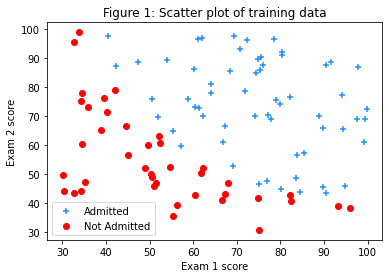

In [8]:
pos = Adm.loc[Adm['Admission'] == 1]
neg = Adm.loc[Adm['Admission'] == 0]

fig, ax = plt.subplots()
ax.scatter(x=pos['Exam_1'], y=pos['Exam_2'], c='dodgerblue', marker='+', label='Admitted')
ax.scatter(x=neg['Exam_1'], y=neg['Exam_2'], c='r', marker='o', label='Not Admitted')
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
ax.set_title('Figure 1: Scatter plot of training data')
plt.legend()

## 3. Implementation

### 3.1 Sigmoid function

In [9]:
# Write the sigmoid function
def sigmoid(x):
    '''
    This function is to calculate the corresponding value of the input value through the sigmoid function.

    Input:
         x(ndarray): the input value
    
    Output:
         g(ndarray): the correspondent value calculated through the sigmoid function.
    '''
    g = 1 / (1 + np.exp(-x))
    return g

In [10]:
# Tests
print(sigmoid(0))
print(sigmoid(10))
print(sigmoid(-10))

0.5
0.9999546021312976
4.5397868702434395e-05


In [11]:
a = np.array([0, 10, -10])
sigmoid(a)

array([5.00000000e-01, 9.99954602e-01, 4.53978687e-05])

In [12]:
b = np.arange(10).reshape(5, 2)
sigmoid(b)

array([[0.5       , 0.73105858],
       [0.88079708, 0.95257413],
       [0.98201379, 0.99330715],
       [0.99752738, 0.99908895],
       [0.99966465, 0.99987661]])

### 3.2 Cost function and gradient

In [13]:
# Write the cost function for logistic regression
def costfunction(theta, m, X, y):
    '''
    This function is to calculate the cost of a logistic regression model.

    Input:
         theta(vector with shape (3, )): parameters
         m(int,the number of rows in X or y, =X.shape[0]): the number of data groups
         X(2-D array): training data
         y(2-D array): flags
    Output:
         cost(float): the cost of a logistic regression model
    '''
    theta = theta.reshape(1, 3)
    h = sigmoid(X.dot(theta.T))
    inner = - y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))
    cost = sum(inner) / m
    return cost

In [14]:
# Tests
m_1 = Adm.shape[0]
theta_1 = np.array([0, 0, 0])
X_1 = Adm.drop(['Admission'], axis=1)
y_1 = Adm['Admission']
costfunction(theta_1, m_1, X_1, y_1)

0.6931471805599452

In [15]:
# Write a function to perform gradient descent
def gradient(theta, m, X, y):
    '''
    This function is to calculate the gradient of cost function.

    Input:
         theta(vector with shape (3, )): parameters
         m(int,the number of rows in X or y, =X.shape[0]): the number of data groups
         X(2-D array): training data
         y(2-D array): flags
    Output:
         gd.flatten()(ndarray, vector with shape (3, )): gradients of each variable
    '''
    diff = sigmoid(X.dot(theta.T)) - y
    gd = np.dot(X.T, diff) / m
    return gd.flatten()

In [16]:
gradient(theta_1, m_1, X_1, y_1)

array([ -0.1       , -12.00921659, -11.26284221])

In [17]:
# Use minimize() to get the values of theta that minimize the cost function
# Similar to fminunc in Octave
import scipy.optimize as sop
theta_initial = np.array([0, 0, 0])
result = sop.minimize(fun=costfunction, x0=theta_initial, args=(m_1, X_1, y_1), method='TNC', jac=gradient)

In [18]:
theta_op = result.x

### 3.3 Decision boundary

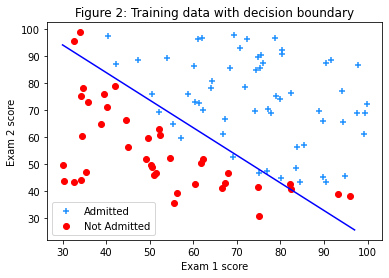

In [19]:
# Plot the decision boundary
fig, ax = plt.subplots()
ax.scatter(x=pos['Exam_1'], y=pos['Exam_2'], c='dodgerblue', marker='+', label='Admitted')
ax.scatter(x=neg['Exam_1'], y=neg['Exam_2'], c='r', marker='o', label='Not Admitted')
x_1 = np.arange(30, 98)
x_2 = (- theta_op[0] - theta_op[1]*x_1) / theta_op[2]
ax.plot(x_1, x_2, 'b-')
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
ax.set_title('Figure 2: Training data with decision boundary')
plt.legend()

### 3.4 Evaluating logistic regression

In [20]:
import copy
# Write a function to make predictions
def prediction(theta, X, type):
    '''
    This function is to make predictions with new data.

    Input:
         theta(vector with shape (3, )): parameters that minimize the cost function
         X(2-D array): training data
         type(str): 'accepted'-predictions about whether being accepted
                    'both'-predictions about the probability of being accepted and whether being accepted
                    other-predictions about the probability of being accepted
    Output:
          probability(ndarray): the probability of being accepted
          accepted(ndarray): whether being accepted
    '''
    probability = sigmoid(X.dot(theta.T))
    if type == 'accepted':
        probability[probability >= 0.5] = 1
        probability[probability < 0.5] = 0
        return probability
    elif type == 'both':
        accepted = copy.deepcopy(probability)
        accepted[accepted >= 0.5] = 1
        accepted[accepted < 0.5] = 0
        return probability, accepted
    else:
        return probability

In [21]:
# Test
X_test = np.array([[1, 45, 85]])
prediction(theta_op, X_test, 'both')

(array([0.77629062]), array([1.]))

## Regularized logistic regression

- In this part of the exercise, you will implement regularized logistic regression
to predict whether microchips from a fabrication plant passes quality assurance
(QA). During QA, each microchip goes through various tests to ensure
it is functioning correctly.
- Suppose you are the product manager of the factory and you have the
test results for some microchips on two different tests. From these two tests,
you would like to determine whether the microchips should be accepted or
rejected. To help you make the decision, you have a dataset of test results
on past microchips, from which you can build a logistic regression model.

## 1. Extract the data

In [50]:
url1 = 'https://raw.githubusercontent.com/SiyuYang-1919/Coursera-ML-AndrewNg-Notes/master/code/ex2-logistic%20regression/ex2data2.txt'
data1 = pd.read_csv(url1, delimiter=',', header=None)

In [53]:
microchip = data1.rename(columns={0: 'Test1', 1: 'Test2', 2: 'Accepted'})

In [54]:
microchip.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [55]:
microchip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Test1     118 non-null    float64
 1   Test2     118 non-null    float64
 2   Accepted  118 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


In [56]:
microchip.describe()

,Test1,Test2,Accepted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


## 2. Visualizing the data

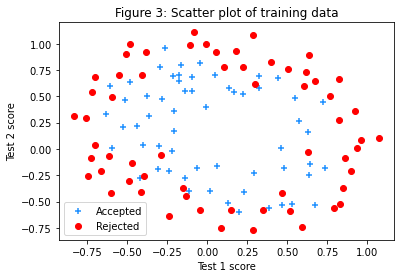

In [60]:
acc = microchip.loc[microchip['Accepted'] == 1]
rej = microchip.loc[microchip['Accepted'] == 0]

fig, ax = plt.subplots()
ax.scatter(x=acc['Test1'], y=acc['Test2'], c='dodgerblue', marker='+', label='Accepted')
ax.scatter(x=rej['Test1'], y=rej['Test2'], c='r', marker='o', label='Rejected')
ax.set_xlabel('Test 1 score')
ax.set_ylabel('Test 2 score')
ax.set_title('Figure 3: Scatter plot of training data')
plt.legend()

- Figure 3 shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straightforward
application of logistic regression will not perform well on this dataset
since logistic regression will only be able to find a linear decision boundary.

## 3. Feature mapping

In [75]:
# Write a function to create more features
def mapfeature(x1, x2, power):
    '''
    This function is to generate more features for training data. 
    How we generate more features: we will generate (power + 1)*(power + 2) / 2 features including 1, x1, x2, x1**2, x1*x2, x2**2, x1**3, x1*x2**2...x1*x2**(power-1), x2**power
   
    Input: 
         x1(ndarray): the data of one feature we currently have
         x2(ndarray): the data of another feature we currently have
         power(int): the highest power value that we want for our new features.

    Output:
         data_fm(2-D array): all the data (including original features and new ones)
    '''
    m = x1.shape[0]
    n = int((power + 1)*(power + 2) / 2)
    data_fm = np.ones((m, n))
    col = 0
    for i in range(0, power+1):
        for j in range(0, i+1):
            data_fm[:, col] = np.power(x1, j)*np.power(x2, i-j)
            col += 1
    return data_fm

In [77]:
# Test
x_1 = microchip['Test1']
x_2 = microchip['Test2']
power_n = 6
X_1 = mapfeature(x_1, x_2, power_n)

## 4. Cost function and gradient

In [101]:
def RegCostFunction(theta, m, X, y, lam):
    '''
    This function is to calculate the cost of a logistic regression model.

    Input:
         theta(vector with shape (3, )): parameters
         m(int,the number of rows in X or y, =X.shape[0]): the number of data groups
         X(2-D array): training data
         y(2-D array): flags
         lam(int): the regularization parameter 
    Output:
         cost(float): the cost of a logistic regression model
    '''
    theta = theta.reshape(1, 28)
    h = sigmoid(X.dot(theta.T))
    inner = - y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))
    inner2 = np.power(theta, 2)
    cost = (np.sum(inner) / m) + (lam*np.sum(inner2) / (2*m))
    return cost

In [102]:
# Test
m_1 = microchip.shape[0]
theta_1 = np.array([0]*28)
y_1 = microchip['Accepted']
lam_1 = 0
RegCostFunction(m=m_1, theta=theta_1, X=X_1, y=y_1, lam=lam_1)

0.6931471805599453

In [150]:
RegCostFunction(m=m_1, theta=theta_1, X=X_1, y=y_1, lam=100)

0.6931471805599453

In [152]:
# Write a function to perform gradient descent
def gradient(theta, m, X, y, lam):
    '''
    This function is to calculate the gradient of cost function.

    Input:
         theta(vector with shape (3, )): parameters
         m(int,the number of rows in X or y, =X.shape[0]): the number of data groups
         X(2-D array): training data
         y(2-D array): flags
         lam(int): the regularization parameter 
    Output:
         gd.flatten()(ndarray, vector with shape (3, )): gradients of each variable
    '''
    gd = np.ones((28, ))
    X_0 = X[:, 0].reshape(118, 1)
    diff = sigmoid(X.dot(theta.T)) - y
    gd[0] = np.dot(X_0.T, diff) / m
    X_1 = X[:, 1:]
    gd[1:] = np.dot(X_1.T, diff) / m + lam*theta[1:] / m
    return gd.flatten()

In [153]:
# Test
gradient(theta=theta_1, m=m_1, X=X_1, y=y_1, lam=lam_1)

array([8.47457627e-03, 7.77711864e-05, 1.87880932e-02, 3.76648474e-02,
       1.15013308e-02, 5.03446395e-02, 2.34764889e-02, 8.19244468e-03,
       7.32393391e-03, 1.83559872e-02, 3.93028171e-02, 3.09593720e-03,
       1.28600503e-02, 2.23923907e-03, 3.93486234e-02, 3.10079849e-02,
       4.47629067e-03, 5.83822078e-03, 3.38643902e-03, 4.32983232e-03,
       1.99707467e-02, 3.87936363e-02, 1.37646175e-03, 7.26504316e-03,
       4.08503006e-04, 6.31570797e-03, 1.09740238e-03, 3.10312442e-02])

In [154]:
gradient(theta=theta_1, m=m_1, X=X_1, y=y_1, lam=100)

array([8.47457627e-03, 7.77711864e-05, 1.87880932e-02, 3.76648474e-02,
       1.15013308e-02, 5.03446395e-02, 2.34764889e-02, 8.19244468e-03,
       7.32393391e-03, 1.83559872e-02, 3.93028171e-02, 3.09593720e-03,
       1.28600503e-02, 2.23923907e-03, 3.93486234e-02, 3.10079849e-02,
       4.47629067e-03, 5.83822078e-03, 3.38643902e-03, 4.32983232e-03,
       1.99707467e-02, 3.87936363e-02, 1.37646175e-03, 7.26504316e-03,
       4.08503006e-04, 6.31570797e-03, 1.09740238e-03, 3.10312442e-02])

In [155]:
result = sop.minimize(fun=RegCostFunction, x0=theta_1, args=(m_1, X_1, y_1, lam_1), method='TNC', jac=gradient)
theta_op = result.x

## 2.5 Plotting the decision boundary

In [113]:
def model(x1, x2):
    '''
    This function is to predict the probability of being accepted.
    '''
    power_0 = 6
    X = mapfeature(x1, x2, 6)
    probability = sigmoid(X.dot(theta_op.T))
    return probability

In [114]:
# Test
x1 = microchip['Test1']
x2 = microchip['Test2']
model(x1, x2).shape

(118,)

In [156]:
def prediction(x1, x2, lam):
    '''
    This function is to predict whether being accepted.

    Input:
         x1(ndarray): the data of the first feature 
         x2(ndarray): the data of the second feature
         lam(int): the regularization parameter
    Output:
         prediction_data(ndarray): the prediction results
    '''
    power_0 = 6
    X = mapfeature(x1, x2, 6)
    m_1 = microchip.shape[0]
    theta_1 = np.array([0]*28)
    y_1 = microchip['Accepted']
    lam_1 = lam
    result = sop.minimize(fun=RegCostFunction, x0=theta_1, args=(m_1, X_1, y_1, lam_1), method='TNC', jac=gradient)
    theta_op = result.x
    prediction_data = sigmoid(X.dot(theta_op.T))
    prediction_data[prediction_data >= 0.5] = 1
    prediction_data[prediction_data < 0.5] = 0
    return prediction_data

In [157]:
# Test
prediction(x1, x2, 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.])

In [158]:
prediction(x1, x2, 10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1.])

In [159]:
def data_DB(lam):
    '''
    This function is to generate data for plotting the decision boundary.

    Input:
         lam(int): the regularization parameter
    Output:
         xx, yy(2-D array): the lines and rows of the grid, based on x and y values defined by np.arange(-1, 1.5, 0.005), the range is equal to the range of two original features.
         zz(2-D array): the lines and rows of the grid, based on the predictions calculated with x, y values defined above.
    '''
    # Define the x and y scale
    x1grid = np.arange(-1, 1.5, 0.005)
    x2grid = np.arange(-1, 1.5, 0.005)
    # Create all of the lines and rows of the grid
    xx, yy = np.meshgrid(x1grid, x2grid)
    # Flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), )), r2.reshape((len(r2), ))
    # Make predictions for the grid
    zgrid = prediction(r1, r2, lam)
    # Reshape the predictions back into a grid
    zz = zgrid.reshape(xx.shape)
    return xx, yy, zz

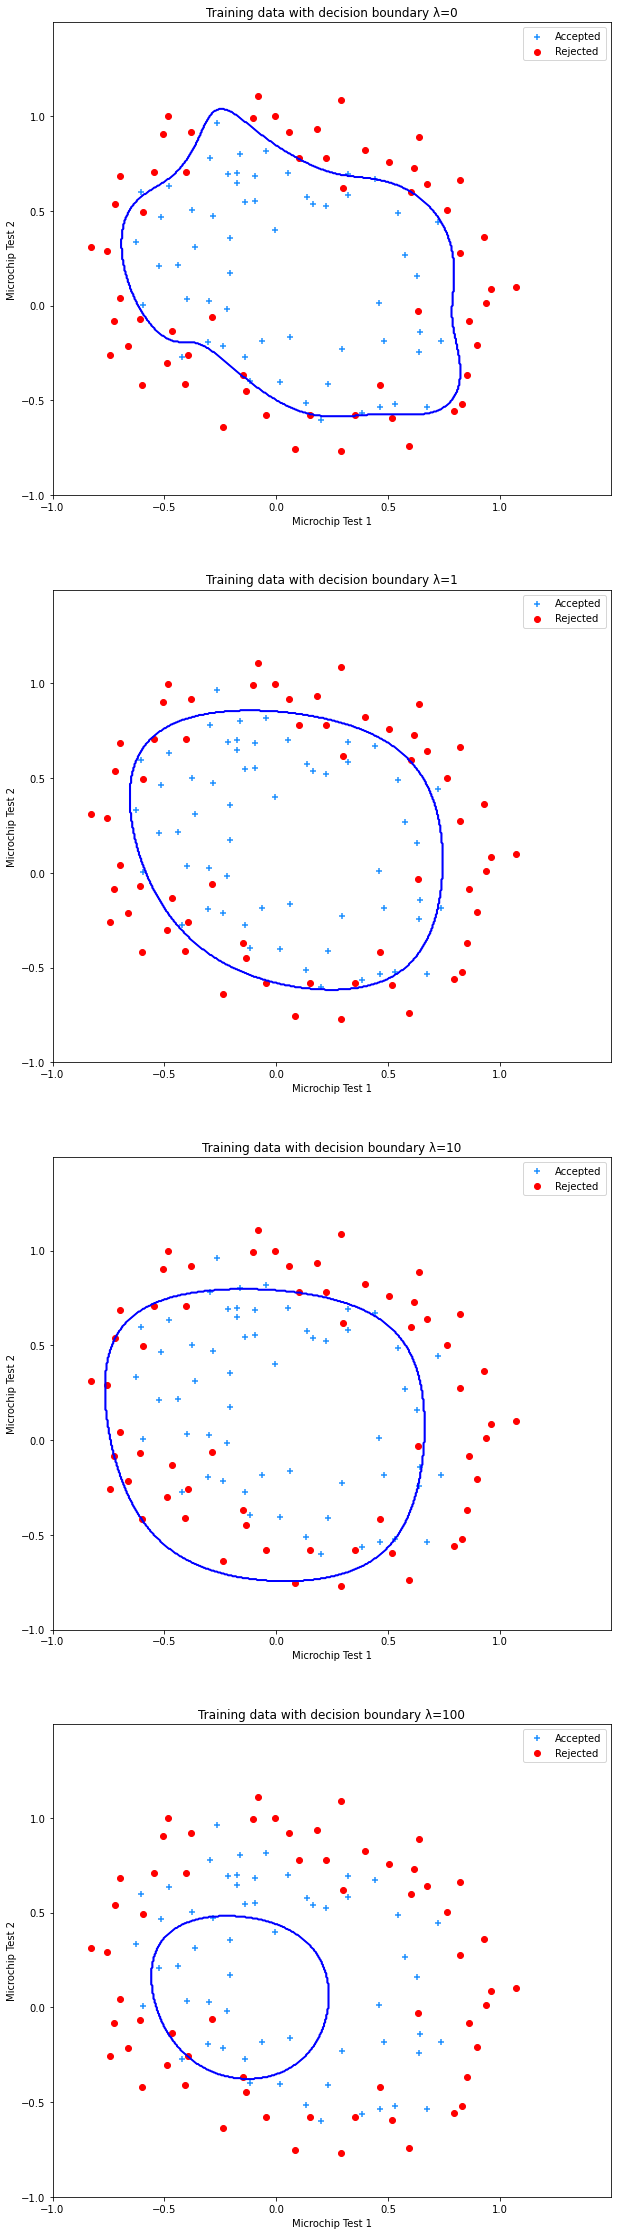

In [163]:
# Plot the grid of x, y and z values as a surface
acc = microchip.loc[microchip['Accepted'] == 1]
rej = microchip.loc[microchip['Accepted'] == 0]
λ = [0, 1, 10, 100]
fig, ax = plt.subplots(4, figsize=(10, 40))
for i in range(4):
    data_pre = data_DB(λ[i])
    ax[i].scatter(x=acc['Test1'], y=acc['Test2'], c='dodgerblue', marker='+', label='Accepted')
    ax[i].scatter(x=rej['Test1'], y=rej['Test2'], c='r', marker='o', label='Rejected')
    ax[i].contour(data_pre[0], data_pre[1], data_pre[2], 1, colors='b')
    ax[i].set_xlabel('Microchip Test 1')
    ax[i].set_ylabel('Microchip Test 2')
    ax[i].set_title('Training data with decision boundary λ='+str(λ[i]))
    ax[i].legend()

Reference: 
- https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07
- https://blog.csdn.net/Mr_Cat123/article/details/80677525?utm_medium=distribute.pc_relevant.none-task-blog-BlogCommendFromBaidu-2.control&depth_1-utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromBaidu-2.control